In [108]:
# Importing libraries and important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)
import statsmodels.api as sm

## (a) Write out the form of the linear model. What are the regression coefficients??

In [109]:
# Creating a linear model
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

* From the above the form of linear model is: y = B0 + B1 + B2 + Error term
* The coefficients are:
  * B0 = 2
  * B1 = 2
  * B2 = 0.3

## (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [110]:
# Create dataframe from above data
df = pd.DataFrame({'x1': x1, 'x2': x2})

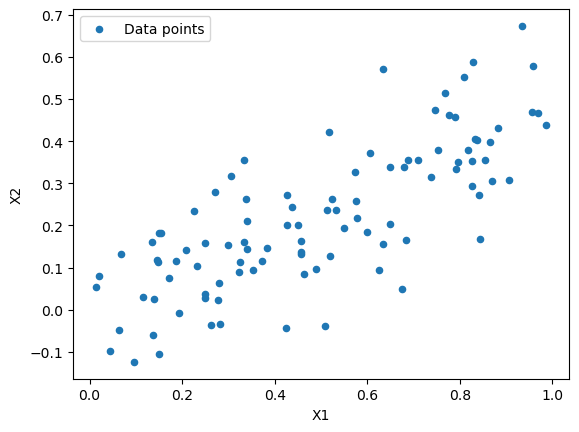

In [111]:
# Create scatter plot to display relationship between variables
ax = df.plot.scatter('x1', 'x2', label = 'Data points')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend();

In [112]:
# Find the correlation between x1 and x2
correlation = np.corrcoef(x1, x2)
correlation

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

## (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained.

In [113]:
design = MS(['x1', 'x2'])
X = design.fit_transform(df)

In [114]:
# Fitting the model
model = sm.OLS(y, X)
results1 = model.fit()

In [115]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           5.76e-08
Time:                        13:21:04   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Answer (c)
* Estimated coefficients:
  * B0 = 1.9579
  * B1 = 1.6154
  * B2 = 0.9428
* In above estimated coefficients the B0 and B1 are little bit small than true but B2 is greater than true.
* The B1 and B2 are not 0 also greater than 1 hence we reject the null hypothesis.

## (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [116]:
# Fitting the model
design1 = MS(['x1'])
newX = design1.fit_transform(df)
model1 = sm.OLS(y, newX)
results2 = model1.fit()

In [117]:
summarize(results2)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


* Results shows that the values of coefficients are close to true coefficients, also standard error is low and p value also low, hence x1 has larger effect on response.
* Yes we can reject the null hypothesis.

## (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [118]:
# Fitting the model
design2 = MS(['x2'])
newX1 = design2.fit_transform(df)
model2 = sm.OLS(y, newX1)
results3 = model2.fit()

In [119]:
summarize(results3)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


* Results shows that the value of B0 is close to true B0 but B1 is greater than true B1 but p value is low, hence we reject the null hypothesis.

## (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

* Yes their is contradict between results due to collinearity between x1 and x2. Their is small direct effect of x2 on y which is shown in (c) but when we apply simple linear regression then it shows large effect.

## (g) Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models?

In [120]:
# Adding new observation
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Create dataframe from above data
df1 = pd.DataFrame({'x1': x1, 'x2': x2})

In [121]:
design3 = MS(['x1', 'x2'])
X2 = design3.fit_transform(df1)

In [122]:
# Fitting the model
model = sm.OLS(y, X2)
results4 = model.fit()

In [123]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           4.60e-08
Time:                        13:21:05   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
design4 = MS(['x1'])
X3 = design4.fit_transform(df1)
model3 = sm.OLS(y, X3)
results5 = model3.fit()

In [125]:
summarize(results5)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


In [126]:
design5 = MS(['x2'])
X4 = design5.fit_transform(df1)
model4 = sm.OLS(y, X4)
results6 = model4.fit()

In [127]:
summarize(results6)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


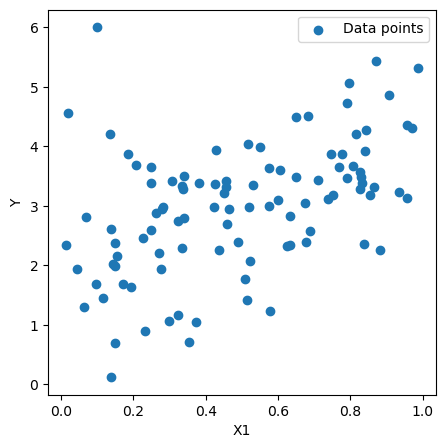

In [128]:
# Plotting the residual plot
ax = plt.subplots(figsize=(5,5))[1]
ax.scatter(df1.x1 , y, label = 'Data points')
ax.set_xlabel('X1')
ax.set_ylabel('Y')
ax.legend();

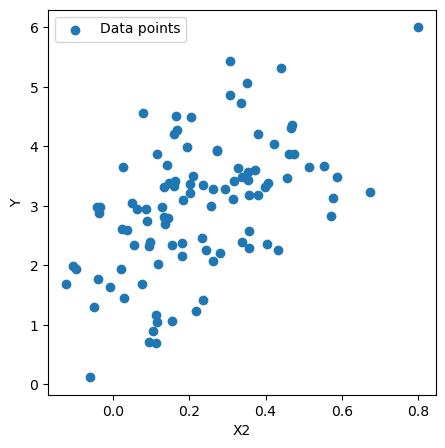

In [129]:
# Plotting the residual plot
ax = plt.subplots(figsize=(5,5))[1]
ax.scatter(df1.x2 , y, label = 'Data points')
ax.set_xlabel('X2')
ax.set_ylabel('Y')
ax.legend();

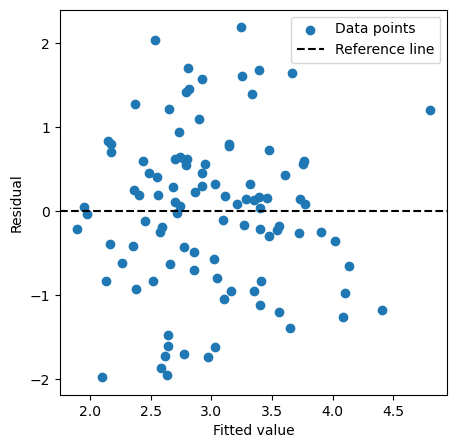

In [130]:
# Plotting the residual plot
ax = plt.subplots(figsize=(5,5))[1]
ax.scatter(results6.fittedvalues , results6.resid, label = 'Data points')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--', label = 'Reference line')
ax.legend();

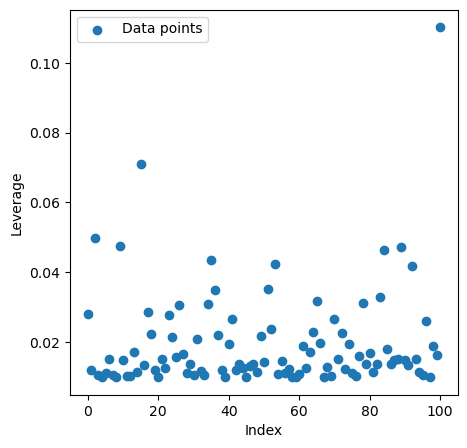

In [131]:
# Plotting the leverage statistics
infl = results6.get_influence()
ax = plt.subplots(figsize=(5,5))[1]
ax.scatter(np.arange(df1.shape[0]), infl.hat_matrix_diag, label = 'Data points')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
ax.legend();